<a href="https://colab.research.google.com/github/CathrynChen8/git-practice/blob/main/InsuranceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance Model

In the notebook, we will be going to analyze the relationship with in insurance data.

## Data Preparation

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [44]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv("https://open-data.s3.filebase.com/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


## Exploratory Data Analysis

### Descriptive Statistics (Learned from the predicting Yield Curve Example)

In [30]:
df.shape

(1338, 7)

In [38]:
# gain information about every variable
df.astype('object').describe()
# get detailed statistics of numerical data
df.describe()

,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,15.960,0.000,1121.874
25%,27.000,26.296,0.000,4740.287
50%,39.000,30.400,1.000,9382.033
75%,51.000,34.694,2.000,16639.913
max,64.000,53.130,5.000,63770.428


### Data Visualiztion

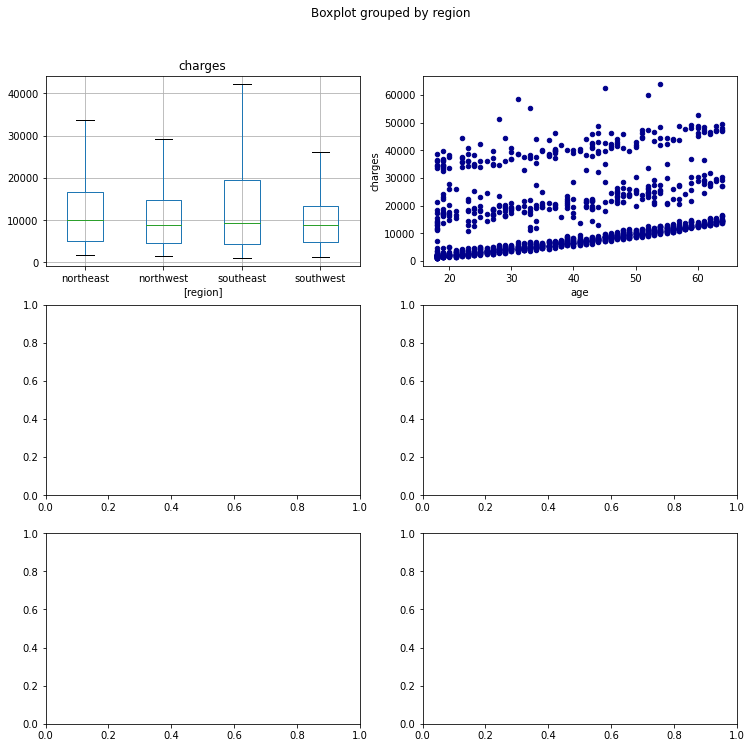

In [60]:
fig, axes = pyplot.subplots(nrows = 3, ncols = 2, figsize = (12, 12))

df.boxplot(column = 'charges', by=['region'], sym = '', figsize = [12, 12], ax = axes[0,0])
df.plot.scatter(y = 'charges', x = 'age' , c = 'DarkBlue', figsize = [12,12], ax = axes[0, 1])


In [22]:
set(df.region.values.tolist())

{'northeast', 'northwest', 'southeast', 'southwest'}

Firstly, I convert every categorical value to numerical value for easier data analysis in model.

In [26]:
df['smoker'] = df.smoker.map(dict(yes = 1, no = 0))
df['sex'] = df.sex.map(dict(female = 1, male = 0))
df['region'] = df.region.map(dict(northeast = 1,northwest = 2, southeast = 3, southwest = 4))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,4,16884.92400
1,18,0,33.770,1,0,3,1725.55230
2,28,0,33.000,3,0,3,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
